In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS =30

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
"PlantVillage",
 shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [6]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

(32, 256, 256, 3)
[0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1]


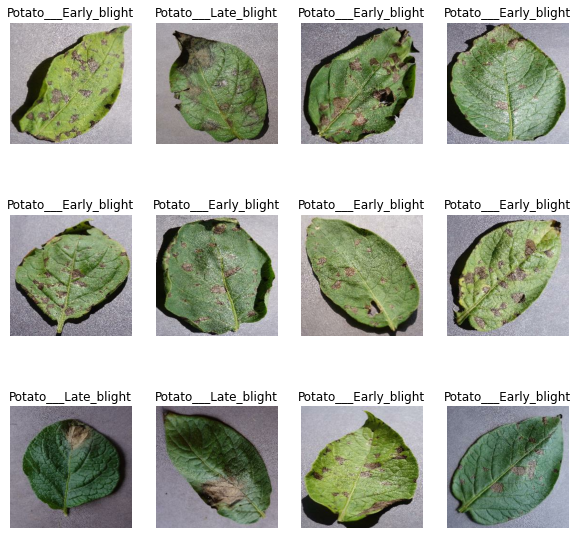

In [7]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [8]:
80% ==> Training
20% ==> 10% validation, 10% test

SyntaxError: invalid syntax (2894956837.py, line 1)

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds =test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_spilt=0.8,val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
        assert (train_spilt+test_split+val_split)==1
        
        ds_size = len(ds)
        
        if shuffle:
            ds = ds.shuffle(shuffle_size, seed=12)
        
        train_size = int(train_spilt*ds_size)
        val_size = int(val_split*ds_size)
        
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
        
        return train_ds, val_ds, test_ds

In [16]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(test_ds)

8

In [19]:
len(val_ds)

6

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [21]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.6392157  0.64705884 0.69803923]
  [0.6627451  0.67058825 0.72156864]
  [0.68235296 0.6901961  0.7411765 ]
  ...
  [0.6862745  0.69411767 0.74509805]
  [0.6745098  0.68235296 0.73333335]
  [0.6862745  0.69411767 0.74509805]]

 [[0.6431373  0.6509804  0.7019608 ]
  [0.6627451  0.67058825 0.72156864]
  [0.68235296 0.6901961  0.7411765 ]
  ...
  [0.6784314  0.6862745  0.7372549 ]
  [0.6784314  0.6862745  0.7372549 ]
  [0.69411767 0.7019608  0.7529412 ]]

 [[0.6392157  0.64705884 0.69803923]
  [0.654902   0.6627451  0.7137255 ]
  [0.6745098  0.68235296 0.73333335]
  ...
  [0.6745098  0.68235296 0.73333335]
  [0.6784314  0.6862745  0.7372549 ]
  [0.6901961  0.69803923 0.7490196 ]]

 ...

 [[0.5019608  0.49411765 0.54509807]
  [0.5176471  0.50980395 0.56078434]
  [0.54509807 0.5372549  0.5882353 ]
  ...
  [0.54509807 0.5372549  0.5882353 ]
  [0.62352943 0.6156863  0.6666667 ]
  [0.627451   0.61960787 0.67058825]]

 [[0.53333336 0.5254902  0.5764706 ]
  [0.5176471  0.50980395 0.56078434]


In [22]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [23]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [24]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [25]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (32, 60, 60, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (32, 30, 30, 64)         

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=30,
)

Epoch 1/30
54/54 [==============================] - 107s 2s/step - loss: 0.9406 - accuracy: 0.4494 - val_loss: 0.8540 - val_accuracy: 0.5312
Epoch 2/30
54/54 [==============================] - 80s 1s/step - loss: 0.7438 - accuracy: 0.6557 - val_loss: 0.5933 - val_accuracy: 0.7656
Epoch 3/30
54/54 [==============================] - 80s 1s/step - loss: 0.4927 - accuracy: 0.7853 - val_loss: 0.3744 - val_accuracy: 0.8490
Epoch 4/30
54/54 [==============================] - 108s 2s/step - loss: 0.3156 - accuracy: 0.8757 - val_loss: 0.4996 - val_accuracy: 0.8177
Epoch 5/30
54/54 [==============================] - 111s 2s/step - loss: 0.2455 - accuracy: 0.9050 - val_loss: 0.4319 - val_accuracy: 0.8229
Epoch 6/30
54/54 [==============================] - 99s 2s/step - loss: 0.2533 - accuracy: 0.8883 - val_loss: 0.2079 - val_accuracy: 0.9271
Epoch 7/30
54/54 [==============================] - 83s 2s/step - loss: 0.2332 - accuracy: 0.9200 - val_loss: 0.2248 - val_accuracy: 0.9115
Epoch 8/30
54/54 

In [28]:
len(test_ds)

8

In [29]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 13s 586ms/step - loss: 0.0218 - accuracy: 0.9883


In [30]:
scores

[0.021804284304380417, 0.98828125]

In [31]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
history.history['loss']

[0.9046761393547058,
 0.6509003043174744,
 0.4725631773471832,
 0.31489527225494385,
 0.23427829146385193,
 0.20131815969944,
 0.20898042619228363,
 0.1280064433813095,
 0.10960115492343903,
 0.08757665753364563,
 0.10358966141939163,
 0.10324303060770035,
 0.0739099457859993,
 0.05067889019846916,
 0.04647095128893852,
 0.04370071366429329,
 0.03414193168282509,
 0.019029224291443825,
 0.05745234712958336,
 0.028681062161922455,
 0.009321870282292366,
 0.05083382502198219,
 0.026997661218047142,
 0.020999850705266,
 0.03871678560972214,
 0.029619036242365837,
 0.003853464499115944,
 0.0006056598504073918,
 0.00033865642035380006,
 0.00022143084788694978]

In [34]:
history.history['accuracy']

[0.47511574625968933,
 0.7094907164573669,
 0.8032407164573669,
 0.8715277910232544,
 0.9108796119689941,
 0.9131944179534912,
 0.9276620149612427,
 0.9467592835426331,
 0.9623842835426331,
 0.9670138955116272,
 0.9623842835426331,
 0.9571759104728699,
 0.9716435074806213,
 0.9814814925193787,
 0.9837962985038757,
 0.984375,
 0.9901620149612427,
 0.9930555820465088,
 0.9797453880310059,
 0.9890046119689941,
 0.9953703880310059,
 0.9872685074806213,
 0.9895833134651184,
 0.9918981194496155,
 0.9855324029922485,
 0.9907407164573669,
 0.9988425970077515,
 1.0,
 1.0,
 1.0]

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

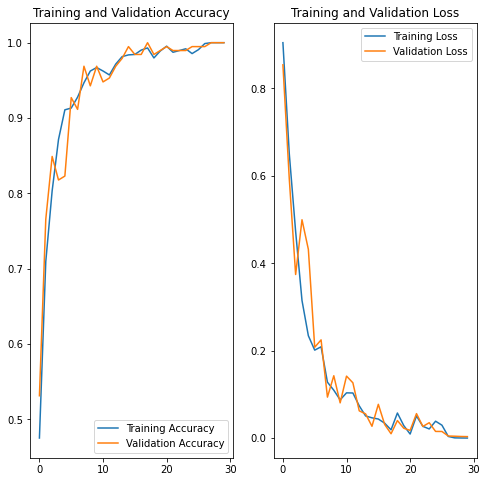

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


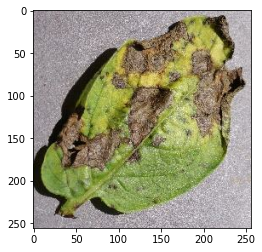

In [37]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

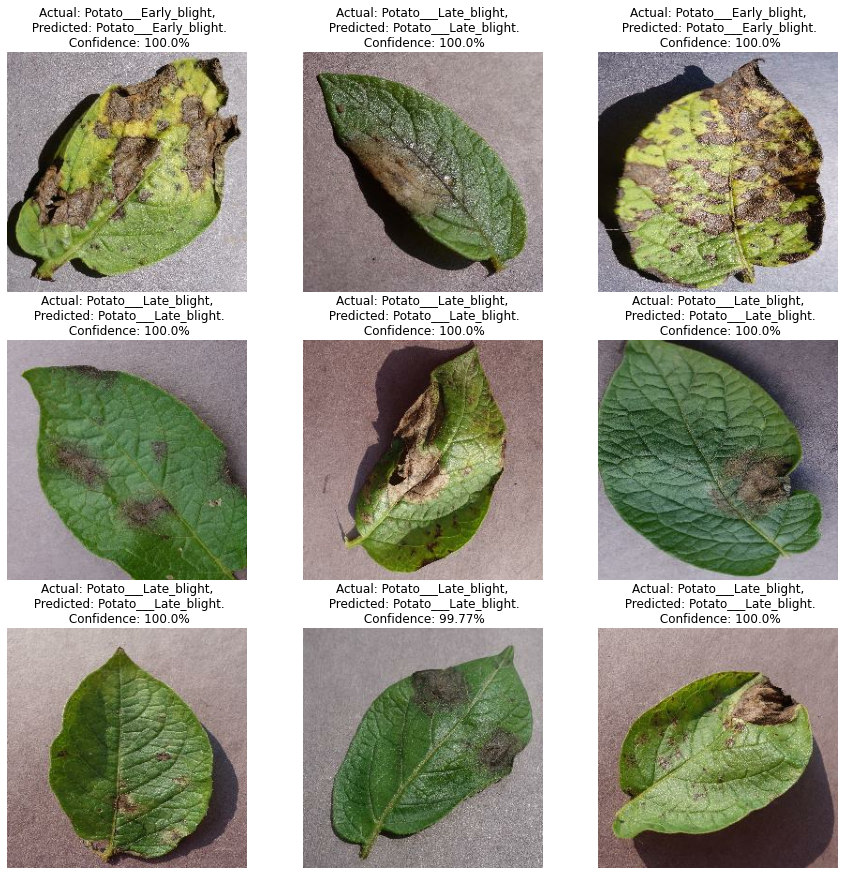

In [39]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [42]:
import os
model_version=max([int(i) for i in os.listdir("../saved_models") + [0]])+1
model.save(f"../saved_models/{model_version}")

INFO:tensorflow:Assets written to: ../saved_models/3\assets
